In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
import tensorflow as tf
import pandas as pd
from tensorflow import keras

# from scipy.io.arff import loadarff 

# from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# from sklearn.svm import SVC
# from sklearn.svm import OneClassSVM as OCSVM
# from sklearn.gaussian_process.kernels import RBF
# from scipy.optimize import minimize
# from sklearn.ensemble import IsolationForest, RandomForestClassifier
# from sklearn.neighbors import LocalOutlierFactor as LOF
# from sklearn.tree import DecisionTreeClassifier

# from xgboost import XGBClassifier

from SupervisedAD_Methods import *

In [2]:
r2l = ["guess_passwd", "warezmaster", "spy", "multihop", "phf", "ftp_write ", "imap"]
columns = (['duration'
,'protocol_type'
,'service'
,'flag'
,'src_bytes'
,'dst_bytes'
,'land'
,'wrong_fragment'
,'urgent'
,'hot'
,'num_failed_logins'
,'logged_in'
,'num_compromised'
,'root_shell'
,'su_attempted'
,'num_root'
,'num_file_creations'
,'num_shells'
,'num_access_files'
,'num_outbound_cmds'
,'is_host_login'
,'is_guest_login'
,'count'
,'srv_count'
,'serror_rate'
,'srv_serror_rate'
,'rerror_rate'
,'srv_rerror_rate'
,'same_srv_rate'
,'diff_srv_rate'
,'srv_diff_host_rate'
,'dst_host_count'
,'dst_host_srv_count'
,'dst_host_same_srv_rate'
,'dst_host_diff_srv_rate'
,'dst_host_same_src_port_rate'
,'dst_host_srv_diff_host_rate'
,'dst_host_serror_rate'
,'dst_host_srv_serror_rate'
,'dst_host_rerror_rate'
,'dst_host_srv_rerror_rate'
,'attack'
,'level'])

In [3]:
def get_df(path, columns=columns, categories=["protocol_type", "service", "flag"], drop=True):
    
    df = pd.read_csv(path, header=None)
    df.columns = columns
    
    if drop:
        
        df = df.drop(columns=categories)        
        
    
    return df.drop_duplicates().reset_index(drop=True)

In [4]:
df = get_df('nsl-kdd/KDDTrain+.txt', columns=columns, drop=False)
df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.06,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20
125969,8,udp,private,SF,105,145,0,0,0,0,...,0.96,0.01,0.01,0.00,0.00,0.00,0.00,0.00,normal,21
125970,0,tcp,smtp,SF,2231,384,0,0,0,0,...,0.12,0.06,0.00,0.00,0.72,0.00,0.01,0.00,normal,18
125971,0,tcp,klogin,S0,0,0,0,0,0,0,...,0.03,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,20


In [5]:
test_df = get_df('nsl-kdd/KDDTest+.txt', columns=columns, drop=False)
test_df

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,attack,level
0,0,tcp,private,REJ,0,0,0,0,0,0,...,0.04,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
1,0,tcp,private,REJ,0,0,0,0,0,0,...,0.00,0.06,0.00,0.00,0.00,0.0,1.00,1.00,neptune,21
2,2,tcp,ftp_data,SF,12983,0,0,0,0,0,...,0.61,0.04,0.61,0.02,0.00,0.0,0.00,0.00,normal,21
3,0,icmp,eco_i,SF,20,0,0,0,0,0,...,1.00,0.00,1.00,0.28,0.00,0.0,0.00,0.00,saint,15
4,1,tcp,telnet,RSTO,0,15,0,0,0,0,...,0.31,0.17,0.03,0.02,0.00,0.0,0.83,0.71,mscan,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22540,0,tcp,http,SF,317,938,0,0,0,0,...,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal,21
22541,0,tcp,http,SF,54540,8314,0,0,0,2,...,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,back,15
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal,21


In [6]:
#  https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

# lists to hold our attack classifications
dos_attacks = ['apache2','back','land','neptune','mailbomb','pod','processtable','smurf','teardrop','udpstorm','worm']
probe_attacks = ['ipsweep','mscan','nmap','portsweep','saint','satan']
privilege_attacks = ['buffer_overflow','loadmdoule','perl','ps','rootkit','sqlattack','xterm']
access_attacks = ['ftp_write','guess_passwd','http_tunnel','imap','multihop','named','phf','sendmail','snmpgetattack','snmpguess','spy','warezclient','warezmaster','xclock','xsnoop']

# we will use these for plotting below
attack_labels = ['Normal','DoS','Probe','Privilege','Access']

# map normal to 0, all attacks to 1
is_attack = df.attack.map(lambda a: 0 if a == 'normal' else 1)
test_attack = test_df.attack.map(lambda a: 0 if a == 'normal' else 1)

#data_with_attack = df.join(is_attack, rsuffix='_flag')
df['attack_flag'] = is_attack
test_df['attack_flag'] = test_attack

# map normal to 1, all attacks to 0
is_normal = df.attack.map(lambda a: 1 if a == 'normal' else 0)
test_normal = test_df.attack.map(lambda a: 1 if a == 'normal' else 0)

df['normal_flag'] = is_normal
test_df['normal_flag'] = test_normal

# helper function to pass to data frame mapping
def map_attack(attack):
    if attack in dos_attacks:
        # dos_attacks map to 1
        attack_type = 1
    elif attack in probe_attacks:
        # probe_attacks mapt to 2
        attack_type = 2
    elif attack in privilege_attacks:
        # privilege escalation attacks map to 3
        attack_type = 3
    elif attack in access_attacks:
        # remote access attacks map to 4
        attack_type = 4
    else:
        # normal maps to 0
        attack_type = 0

    return attack_type

# map the data and join to the data set
attack_map = df.attack.apply(map_attack)
df['attack_map'] = attack_map

test_attack_map = test_df.attack.apply(map_attack)
test_df['attack_map'] = test_attack_map

# categorical features
features_to_encode = ['protocol_type', 'service', 'flag']

# get numeric features, we won't worry about encoding these at this point
# numeric_features = ['duration', 'src_bytes', 'dst_bytes']
# Use all features
numeric_features = list(set(df.columns[:-5]) - set(features_to_encode))


def feat_eng(df, test_df, features_to_encode=features_to_encode, numeric_features=numeric_features):
#     https://www.kaggle.com/code/avk256/nsl-kdd-anomaly-detection/notebook

    # get the intial set of encoded features and encode them
    encoded = pd.get_dummies(df[features_to_encode])
    test_encoded_base = pd.get_dummies(test_df[features_to_encode])

    # not all of the features are in the test set, so we need to account for diffs
    test_index = np.arange(len(test_df.index))
    column_diffs = list(set(encoded.columns.values)-set(test_encoded_base.columns.values))

    diff_df = pd.DataFrame(0, index=test_index, columns=column_diffs)

    # we'll also need to reorder the columns to match, so let's get those
    column_order = encoded.columns.to_list()

    # append the new columns
    test_encoded_temp = test_encoded_base.join(diff_df)

    # reorder the columns
    test_final = test_encoded_temp[column_order].fillna(0)

    # model to fit/test
    to_fit = encoded.join(df[numeric_features])
    test_set = test_final.join(test_df[numeric_features])
    
    return to_fit, test_set

In [7]:
data_train, data_test = feat_eng(df, test_df)
data_train

,protocol_type_icmp,protocol_type_tcp,protocol_type_udp,service_IRC,service_X11,service_Z39_50,service_aol,service_auth,service_bgp,service_courier,...,dst_host_rerror_rate,src_bytes,hot,is_guest_login,srv_serror_rate,dst_host_serror_rate,dst_bytes,is_host_login,dst_host_srv_rerror_rate,srv_rerror_rate
0,False,True,False,False,False,False,False,False,False,False,...,0.05,491,0,0,0.0,0.00,0,0,0.00,0.0
1,False,False,True,False,False,False,False,False,False,False,...,0.00,146,0,0,0.0,0.00,0,0,0.00,0.0
2,False,True,False,False,False,False,False,False,False,False,...,0.00,0,0,0,1.0,1.00,0,0,0.00,0.0
3,False,True,False,False,False,False,False,False,False,False,...,0.00,232,0,0,0.2,0.03,8153,0,0.01,0.0
4,False,True,False,False,False,False,False,False,False,False,...,0.00,199,0,0,0.0,0.00,420,0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125968,False,True,False,False,False,False,False,False,False,False,...,0.00,0,0,0,1.0,1.00,0,0,0.00,0.0
125969,False,False,True,False,False,False,False,False,False,False,...,0.00,105,0,0,0.0,0.00,145,0,0.00,0.0
125970,False,True,False,False,False,False,False,False,False,False,...,0.01,2231,0,0,0.0,0.72,384,0,0.00,0.0
125971,False,True,False,False,False,False,False,False,False,False,...,0.00,0,0,0,1.0,1.00,0,0,0.00,0.0


In [8]:
scaler = StandardScaler()

new_attacks = [1,2,3,4]
test_classes = [0,1,2,3,4]


def get_x_y(df, data, classes=[0,1]):

    indices = df['attack_map'].isin(classes)
    x = data[indices]
    y = df['normal_flag'][indices]
    
    return x.to_numpy(), y.to_numpy()


x_train, y = get_x_y(df, data_train)
X = scaler.fit_transform(x_train)

np.random.seed(0)
np.random.shuffle(X)
np.random.seed(0)
np.random.shuffle(y)

x_testing, y_test = get_x_y(test_df, data_test, classes=test_classes)
x_test = scaler.transform(x_testing)

In [128]:
print(len(y))

113279


In [10]:
#84 - 122
np.amax(x_test, axis = 0)

array([ 5.12413283e+00,  4.27188550e-01,  2.73872239e+00,  2.46582011e+01,
        4.11063419e+01,  1.14940336e+01,  0.00000000e+00,  1.09379117e+01,
        1.26908887e+01,  1.24511719e+01,  1.45441039e+01,  1.44760410e+01,
        1.49735353e+01,  1.47256318e+01,  1.43690882e+01,  3.39693764e+00,
        1.64713475e+01,  1.50640484e+01,  6.02797806e+00,  1.53618149e+01,
        1.55759672e+01,  8.07025486e+00,  8.91368808e+00,  4.15723486e+00,
        1.52500803e+01,  0.00000000e+00,  1.58877494e+01,  1.34559070e+00,
        0.00000000e+00,  1.46831416e+01,  0.00000000e+00,  1.34255875e+01,
        1.29159104e+01,  1.62953620e+01,  1.96708358e+01,  1.67358696e+01,
        1.57643019e+01,  1.63924344e+01,  1.64713475e+01,  1.62379359e+01,
        1.69698863e+01,  1.83341179e+01,  1.79883757e+01,  1.81190347e+01,
        1.34581046e+01,  2.00531323e+01,  2.59476350e+01,  6.44624656e+00,
        1.00000000e+00,  4.02153134e+01,  2.11362978e+01,  4.27326648e+01,
        2.38368291e+00, -

In [11]:
def minMaxValues(x, y):
    maxIndicies = np.argmax(x, axis=0)
    minIndicies = np.argmin(x, axis=0)

    maxTypes = []
    minTypes = []
    for i in range(maxIndicies.size):
        maxTypes.append(y[maxIndicies[i]])
        minTypes.append(y[minIndicies[i]])

    maxTypes = np.array(maxTypes)
    minTypes = np.array(minTypes)

    maxNormals = np.count_nonzero(maxTypes == 0)
    minNormals = np.count_nonzero(minTypes == 0)

    maxAbnormal = maxTypes.size - maxNormals
    minAbnormal = minTypes.size - minNormals

    maxNormalRate = round(maxNormals / maxTypes.size, 5)
    minNormalRate = round(minNormals / minTypes.size, 5)

    print(f'For max values there was {maxNormals} which were normal and {maxAbnormal} which were abnormal which yields a normal rate of {maxNormalRate}')
    print(f'For min values there was {minNormals} which were normal and {minAbnormal} which were abnormal which yields a normal rate of {minNormalRate}')
    yNormal = np.count_nonzero(y == 0)
    yTotal = y.size
    normalPercent = round(yNormal / yTotal, 5)
    print(f'{normalPercent} of the data set was normal')

In [12]:
print("Train")
minMaxValues(X, y)
print("Test")
minMaxValues(x_test, y_test)

Train
For max values there was 74 which were normal and 48 which were abnormal which yields a normal rate of 0.60656
For min values there was 108 which were normal and 14 which were abnormal which yields a normal rate of 0.88525
0.40551 of the data set was normal
Test
For max values there was 99 which were normal and 23 which were abnormal which yields a normal rate of 0.81148
For min values there was 111 which were normal and 11 which were abnormal which yields a normal rate of 0.90984
0.56924 of the data set was normal


In [15]:
print("Train with only numerical")
minMaxValues(X[0:][84:], y[0:][84:])
print("Test with only numerical")
minMaxValues(x_test[0:][84:], y_test[0:][84:])


Train with only numerical
For max values there was 64 which were normal and 58 which were abnormal which yields a normal rate of 0.52459
For min values there was 5 which were normal and 117 which were abnormal which yields a normal rate of 0.04098
0.40555 of the data set was normal
Test with only numerical
For max values there was 89 which were normal and 33 which were abnormal which yields a normal rate of 0.72951
For min values there was 7 which were normal and 115 which were abnormal which yields a normal rate of 0.05738
0.5695 of the data set was normal


In [19]:
print(X.size / 122 * (122-84))
print(X[:,84:].size)

4304602.0
4304602


In [145]:
def allMinMaxValues(X, y):
    yNormal = np.count_nonzero(y == 0)
    yTotal = y.size
    normalPercent = round(yNormal / yTotal, 5)
    
    print("RUNNING MAX VALUE CHECK")
    totals = []
    averageHigh = 0
    avgDivHigh = 0
    averageLow = 0
    avgDivLow = 0
    maxHighAtributes = []
    maxLowAtributes = []
    for i in range(X[0].size):
        totals.append(np.argwhere(X[:,i] == np.amax(X[:,i])).flatten().tolist())
        
    for i in range(len(totals)):
        totalsType = []
        for j in range(len(totals[i])):
                totalsType.append(y[totals[i][j]])
        totalsType = np.array(totalsType)

        totalsNormal = np.count_nonzero(totalsType == 0)

        totalsAbnormal = len(totalsType) - totalsNormal

        totalNormalRate = round(totalsNormal / (totalsNormal + totalsAbnormal), 5)

        if (totalsNormal + totalsAbnormal < len(y) * .2):
            if(totalNormalRate > normalPercent):
                avgDivHigh += 1
                averageHigh += totalNormalRate
                maxHighAtributes.append(i)
            else:
                avgDivLow += 1
                averageLow += totalNormalRate
                maxLowAtributes.append(i)

            print(f'attribute number {i} {totalNormalRate} total normals {totalsNormal} total Abnormals {totalsAbnormal}')
    
    print(f'High average {round(averageHigh/ avgDivHigh, 5)} ')
    print(f'Low average {round(averageLow/ avgDivLow, 5)} ')
    

    print("RUNNING MIN VALUE CHECK")
    totals = []
    averageHigh = 0
    avgDivHigh = 0
    averageLow = 0
    avgDivLow = 0
    minHighAtributes = []
    minLowAtributes = []
    for i in range(X[0].size):
        totals.append(np.argwhere(X[:,i] == np.amin(X[:,i])).flatten().tolist())
        
    for i in range(len(totals)):
        totalsType = []
        for j in range(len(totals[i])):
                totalsType.append(y[totals[i][j]])
        totalsType = np.array(totalsType)

        totalsNormal = np.count_nonzero(totalsType == 0)

        totalsAbnormal = len(totalsType) - totalsNormal

        totalNormalRate = round(totalsNormal / (totalsNormal + totalsAbnormal), 5)

        #sometimes most/all values were min/max value and skewed average
        if (totalsNormal + totalsAbnormal < len(y) * .2):
            if(totalNormalRate > normalPercent):
                avgDivHigh += 1
                averageHigh += totalNormalRate
                minHighAtributes.append(i)
            else:
                avgDivLow += 1
                averageLow += totalNormalRate
                minLowAtributes.append(i)

            print(f'attribute number {i} {totalNormalRate} total normals {totalsNormal} total Abnormals {totalsAbnormal}')

    print(f'High average {round(averageHigh/ avgDivHigh, 5)} ')
    print(f'Low average {round(averageLow/ avgDivLow, 5)} ')
    print("**************************************************")
    print(f'maxHighAtributes {maxHighAtributes}')
    print(f'maxLowAtributes {maxLowAtributes}')
    print(f'minHighAtributes {minHighAtributes}')
    print(f'minLowAtributes {minLowAtributes}')

In [146]:
allMinMaxValues(X, y)

RUNNING MAX VALUE CHECK
attribute number 0 0.68503 total normals 2847 total Abnormals 1309
attribute number 2 0.06694 total normals 892 total Abnormals 12434
attribute number 3 0.0 total normals 0 total Abnormals 186
attribute number 4 0.0 total normals 0 total Abnormals 67
attribute number 5 1.0 total normals 851 total Abnormals 0
attribute number 7 0.74867 total normals 703 total Abnormals 236
attribute number 8 1.0 total normals 699 total Abnormals 0
attribute number 9 1.0 total normals 726 total Abnormals 0
attribute number 10 1.0 total normals 533 total Abnormals 0
attribute number 11 1.0 total normals 538 total Abnormals 0
attribute number 12 1.0 total normals 503 total Abnormals 0
attribute number 13 1.0 total normals 520 total Abnormals 0
attribute number 14 0.9304 total normals 508 total Abnormals 38
attribute number 15 0.0 total normals 0 total Abnormals 9034
attribute number 16 1.0 total normals 416 total Abnormals 0
attribute number 17 0.0 total normals 0 total Abnormals 49

In [147]:
allMinMaxValues(x_test, y_test)

RUNNING MAX VALUE CHECK
attribute number 0 0.91083 total normals 950 total Abnormals 93
attribute number 2 0.3224 total normals 845 total Abnormals 1776
attribute number 3 0.23077 total normals 3 total Abnormals 10
attribute number 4 0.73333 total normals 11 total Abnormals 4
attribute number 5 1.0 total normals 45 total Abnormals 0
attribute number 7 0.71642 total normals 48 total Abnormals 19
attribute number 8 1.0 total normals 46 total Abnormals 0
attribute number 9 1.0 total normals 40 total Abnormals 0
attribute number 10 1.0 total normals 34 total Abnormals 0
attribute number 11 1.0 total normals 41 total Abnormals 0
attribute number 12 1.0 total normals 28 total Abnormals 0
attribute number 13 1.0 total normals 26 total Abnormals 0
attribute number 14 1.0 total normals 51 total Abnormals 0
attribute number 15 0.00224 total normals 2 total Abnormals 892
attribute number 16 1.0 total normals 37 total Abnormals 0
attribute number 17 0.90076 total normals 236 total Abnormals 26
att

In [67]:
totals = set(totals)
#test only one row of totals to see what happens also extend for append
print(len(y) > len(totals))

TypeError: unhashable type: 'list'

In [88]:
totalsType = []
for i in range(len(totals[84])):
        totalsType.append(y[totals[84][i]])
print(totalsType)

[1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [89]:
totalsType = np.array(totalsType)

totalsNormal = np.count_nonzero(totalsType == 1)
print(totalsNormal)

totalsAbnormal = len(totalsType) - totalsNormal

totalNormalRate = round(totalsNormal / (totalsNormal + totalsAbnormal), 5)

print(totalNormalRate)

42153
0.95147


In [22]:
print(y.size)
print(np.argmax(X, axis=0).size)
print(np.argwhere(X == np.amax(X, axis=0)).flatten().size)

113279
122
3168228


In [19]:
#note most picking max/min values yielded more normal than abnormal while you would generally think the opposite
#possibly dont look at the categorical ones 84+
#some atributes provide no value because most/all of the values are equal at min or equal at max therefore normal rate is approx the same as whole population
#min check for all occurances is approxemetly average performance
#average is split, sometimes when its max it means it is an anomaly sometimes it means its normal, depens on the atribute
#ignoring the atributes which have flush max/min values and then splitting the data by above .4 and below .4 (total normal rate without manipulation) then we
#get relativley good rates for both min and max
#some atributes produce high values for train while low values for test?

In [190]:
maxes = np.amax(X, axis=0)
mins = np.amin(X, axis=0)
indicies = []
for i in range(maxes.size):
        indicies.extend(np.argwhere(x_test[:, i] >= maxes[i]).flatten().tolist())
for i in range(mins.size):
        indicies.extend(np.argwhere(x_test[:, i] <= mins[i]).flatten().tolist())
indicies = set(indicies)
values = []
for x in indicies:
        values.append(y_test[x])
print(values)
print(np.count_nonzero(np.array(values) == 0))
print(np.count_nonzero(np.array(values) == 0) / len(indicies))

[0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 

In [ ]:
def allMinMaxValues(X, y):
    yNormal = np.count_nonzero(y == 0)
    yTotal = y.size
    normalPercent = round(yNormal / yTotal, 5)
    
    print("RUNNING MAX VALUE CHECK")
    totals = []
    averageHigh = 0
    avgDivHigh = 0
    averageLow = 0
    avgDivLow = 0
    maxHighAtributes = []
    maxLowAtributes = []
    for i in range(X[0].size):
        totals.append(np.argwhere(X[:,i] == np.amax(X[:,i])).flatten().tolist())
        
    for i in range(len(totals)):
        totalsType = []
        for j in range(len(totals[i])):
                totalsType.append(y[totals[i][j]])
        totalsType = np.array(totalsType)

        totalsNormal = np.count_nonzero(totalsType == 0)

        totalsAbnormal = len(totalsType) - totalsNormal

        totalNormalRate = round(totalsNormal / (totalsNormal + totalsAbnormal), 5)

        if (totalsNormal + totalsAbnormal < len(y) * .2):
            if(totalNormalRate > normalPercent):
                avgDivHigh += 1
                averageHigh += totalNormalRate
                maxHighAtributes.append(i)
            else:
                avgDivLow += 1
                averageLow += totalNormalRate
                maxLowAtributes.append(i)

            print(f'attribute number {i} {totalNormalRate} total normals {totalsNormal} total Abnormals {totalsAbnormal}')
    
    print(f'High average {round(averageHigh/ avgDivHigh, 5)} ')
    print(f'Low average {round(averageLow/ avgDivLow, 5)} ')
    

    print("RUNNING MIN VALUE CHECK")
    totals = []
    averageHigh = 0
    avgDivHigh = 0
    averageLow = 0
    avgDivLow = 0
    minHighAtributes = []
    minLowAtributes = []
    for i in range(X[0].size):
        totals.append(np.argwhere(X[:,i] == np.amin(X[:,i])).flatten().tolist())
        
    for i in range(len(totals)):
        totalsType = []
        for j in range(len(totals[i])):
                totalsType.append(y[totals[i][j]])
        totalsType = np.array(totalsType)

        totalsNormal = np.count_nonzero(totalsType == 0)

        totalsAbnormal = len(totalsType) - totalsNormal

        totalNormalRate = round(totalsNormal / (totalsNormal + totalsAbnormal), 5)

        #sometimes most/all values were min/max value and skewed average
        if (totalsNormal + totalsAbnormal < len(y) * .2):
            if(totalNormalRate > normalPercent):
                avgDivHigh += 1
                averageHigh += totalNormalRate
                minHighAtributes.append(i)
            else:
                avgDivLow += 1
                averageLow += totalNormalRate
                minLowAtributes.append(i)

            print(f'attribute number {i} {totalNormalRate} total normals {totalsNormal} total Abnormals {totalsAbnormal}')

    print(f'High average {round(averageHigh/ avgDivHigh, 5)} ')
    print(f'Low average {round(averageLow/ avgDivLow, 5)} ')
    print("**************************************************")
    print(f'maxHighAtributes {maxHighAtributes}')
    print(f'maxLowAtributes {maxLowAtributes}')
    print(f'minHighAtributes {minHighAtributes}')
    print(f'minLowAtributes {minLowAtributes}')

In [252]:
maxes = np.amax(X, axis=0)
mins = np.amin(X, axis=0)
indiciesAndOutlier = {}
indicies = []
completeIndexN = {}
completeIndexA = {}
for i in range(maxes.size):
        curr = np.argwhere(x_test[:, i] > maxes[i]).flatten().tolist()
        indicies.extend(curr)
        for j in curr:
                if y_test[j] == 0:
                        completeIndexN[i] = completeIndexN.get(i, 0) + 1
                else:
                        completeIndexA[i] = completeIndexA.get(i, 0) + 1
                indiciesAndOutlier[j] = [maxes[i], x_test[j,i]]
for i in range(mins.size):
        curr = np.argwhere(x_test[:, i] < mins[i]).flatten().tolist()
        indicies.extend(curr)
        for j in curr:
                if y_test[j] == 0:
                        completeIndexN[i] = completeIndexN.get(i, 0) + 1
                else:
                        completeIndexA[i] = completeIndexA.get(i, 0) + 1
                indiciesAndOutlier[j] = [mins[i], x_test[j,i]]
indicies = set(indicies)
values = []
for x in indicies:
        values.append(y_test[x])
print(values)
print(np.count_nonzero(np.array(values) == 0))
print(np.count_nonzero(np.array(values) == 0) / len(indicies))

[0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]
19
0.76


In [265]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
extendedValuesN = []
extendedValuesA = []
for x in indiciesAndOutlier:
    if y_test[x] == 0:
        extendedValuesN.append(indiciesAndOutlier[x][1] - indiciesAndOutlier[x][0])
    else:
        extendedValuesA.append(indiciesAndOutlier[x][1] - indiciesAndOutlier[x][0])

extendedValuesN = np.array(extendedValuesN)
extendedValuesN = extendedValuesN.reshape(-1,1)
extendedValuesN = scaler.fit_transform(extendedValuesN).flatten()

extendedValuesA = np.array(extendedValuesA)
extendedValuesA = extendedValuesA.reshape(-1,1)
extendedValuesA = scaler.fit_transform(extendedValuesA).flatten()

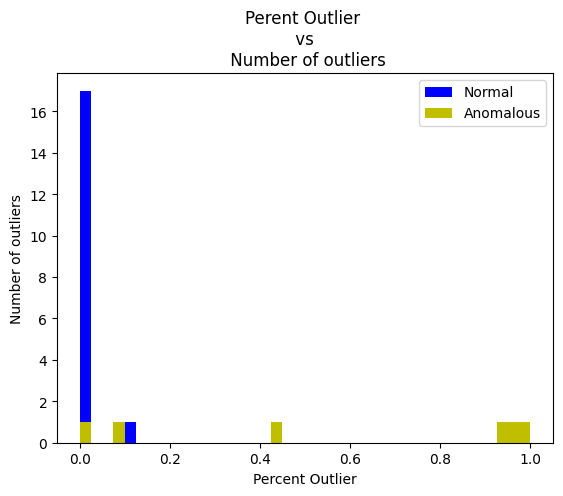

In [272]:
plt.hist(extendedValuesN, bins = 40, color='b', label='Normal')
plt.hist(extendedValuesA, bins = 40, color='y', label='Anomalous')
plt.xlabel('Percent Outlier')
plt.ylabel('Number of outliers')
plt.title('Perent Outlier \n vs \n Number of outliers')
plt.legend()
plt.show()



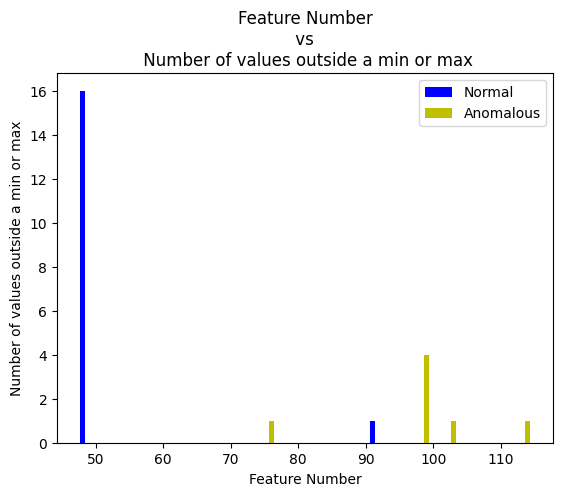

In [258]:
featuresAnomN = list(completeIndexN.keys())
numFeaturesN = list(completeIndexN.values())
featuresAnomA = list(completeIndexA.keys())
numFeaturesA = list(completeIndexA.values())

plt.bar(featuresAnomN, numFeaturesN, label='Normal', color='b')
plt.bar(featuresAnomA, numFeaturesA, label='Anomalous', color='y')
plt.xlabel('Feature Number')
plt.ylabel('Number of values outside a min or max')
plt.title('Feature Number\n vs \n Number of values outside a min or max')
plt.legend()

plt.show()